## Karar Ağacı Kullanarak Bireylerin Cinsiyetlerini Tahminleyen Program 


In [32]:
#Kullanacağımız kütüphanelerimizi yüklüyoruz
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

## 1.Veri Toplama

In [33]:
#Excel Üzerindeki Veri Setimizi Çalışma Sayfamıza Aktarıyoruz
df=pd.read_csv("Bar-Genders.csv",delimiter=";")

## 2.Veri Analizi

In [34]:
df

,FavoriteColor,FavoriteMusicGenre,FavoriteBeverage,FavoriteSoftDrink,Gender,Predicted_Gender
0,Cool,Rock,Vodka,7UP/Sprite,F,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F,F
...,...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M,F
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M,F
63,Neutral,Hip hop,Doesn't drink,Fanta,M,F
64,Cool,Rock,Wine,Coca Cola/Pepsi,M,F


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FavoriteColor       66 non-null     object
 1   FavoriteMusicGenre  66 non-null     object
 2   FavoriteBeverage    66 non-null     object
 3   FavoriteSoftDrink   66 non-null     object
 4   Gender              66 non-null     object
 5   Predicted_Gender    66 non-null     object
dtypes: object(6)
memory usage: 3.2+ KB


## 3.Sonuçların Görselleştirilmesi

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kfold=KFold(10,shuffle=True,random_state=True)

In [37]:
#kategorik verileri (metin etiketleri) sayısal temsillere dönüştürme
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        
X = df.drop("Gender", axis=1)
y = df.Gender

In [38]:
X=df.drop("Gender",axis=1)
y=df.Gender
k=0
accuracy=[]
for train,test in kfold.split(df):
    print(k,len(train),len(test))
    k+=1
    trainSet=df.iloc[train]
    testSet=df.iloc[test]

    dt=tree.DecisionTreeClassifier(criterion="gini")
    dt.fit(trainSet.drop("Gender",axis=1),trainSet.Gender)

    pred=dt.predict(testSet.drop("Gender",axis=1))
    score=accuracy_score(testSet.Gender,pred)
    accuracy.append(score)
    print("Accuracy:"+str(score))


0 59 7
Accuracy:0.2857142857142857
1 59 7
Accuracy:0.2857142857142857
2 59 7
Accuracy:0.5714285714285714
3 59 7
Accuracy:0.7142857142857143
4 59 7
Accuracy:0.7142857142857143
5 59 7
Accuracy:0.5714285714285714
6 60 6
Accuracy:0.6666666666666666
7 60 6
Accuracy:0.6666666666666666
8 60 6
Accuracy:0.6666666666666666
9 60 6
Accuracy:0.6666666666666666


## 4.Sonuçların Yorumlanması 

0.580952380952381


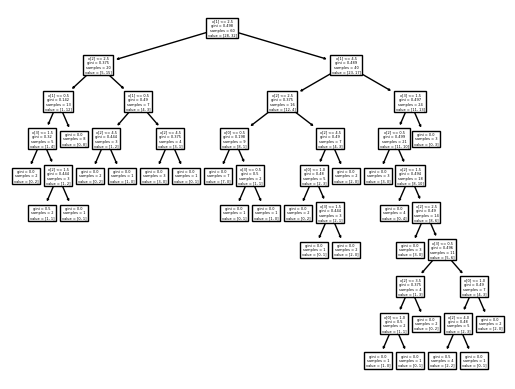

In [39]:
print(sum(accuracy)/len(accuracy))
from matplotlib import pyplot as plt
tree.plot_tree(dt)
plt.show()